

# Text classification w/ sentiment analysis
In this document I follow the tutorial from https://www.tensorflow.org/tutorials/keras/text_classification


#Tutorial 2:
Stackoverflow

In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [25]:
url = 'http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset = tf.keras.utils.get_file("stack_overflow_16k", origin=url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')
# print(tf.keras.utils.get_file("stack_overflow_16k", url,
#                                     untar=True, cache_dir='.',
#                                     cache_subdir=''))
dataset_dir = os.path.join(os.path.dirname(dataset), 'stack_overflow')

In [26]:
os.listdir(dataset_dir)

['test', 'train']

In [27]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['java', 'csharp', 'javascript', 'python']

In [28]:
sample_file = os.path.join(train_dir, 'python/1.txt')
with open(sample_file) as f:
  print(f.read())

"how to create an infinite loop with apply_async? i havea pool of processes with apply_async in which the different processes take different times to provide output. once one process is finished i do some calculations with their output. after i want to launch another process. in this way i want to create an infinite loop which launches processes, reads the output of the recently finished process, does some calculations and relaunches another process...so far i have been able to do what i want except that the main process gets stuck in the get() function. this because i don't know which process terminated and hence which entry of results i should do get()...some attempt code:..import multiprocessing as mp.import numpy as np.from time import sleep...def squared(x,y):.    result = np.array((x,x)).    if x%2 == 0:.    sleep(2) .return result.....if __name__ == ""__main__"":..    pool = mp.pool() ..    pool_r = [].    for i in xrange(0,8):.        pool_r.append(pool.apply_async(squared, (i,

In [30]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'stack_overflow/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [31]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Question", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Question b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default const

In [33]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])
print("Label 2 corresponds to", raw_train_ds.class_names[2])
print("Label 3 corresponds to", raw_train_ds.class_names[3])

Label 0 corresponds to csharp
Label 1 corresponds to java
Label 2 corresponds to javascript
Label 3 corresponds to python


In [35]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'stack_overflow/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [39]:
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'stack_overflow/test', 
    batch_size=batch_size)

Found 8000 files belonging to 4 classes.


In [40]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [41]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [43]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [44]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [45]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'"set blank to quit on exception? i\'m using blank 3..i\'ve been looking around for an answer to this, but i haven\'t found it yet. basically, i\'m running several blank scripts into a game engine, and each script has its own entry point...i\'d rather not add try: except blocks through all of my code, so i was wondering if it\'s at all possible to tell blank to quit (or perhaps assign a custom function to that ""callback"") on finding its first error, regardless of where or what it found? ..currently, the game engine will continue after finding and hitting an error, making it more difficult than necessary to diagnose issues since running into one error may make a subsequent script not work (as it relies on variables that the error-ing script set, for example). any ideas? ..i know that i could redirect the console to a file to allow for easier scrolling, but just capturing the first error and stopping the game prematurely would be really useful...okay, a couple of extr

In [46]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  scissors
 313 --->  source
Vocabulary size: 10000


In [47]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [48]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [53]:
embedding_dim = 16
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(4)])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 160,084
Trainable params: 160,084
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/50
200/200 [==============================] - 1s 7ms/step - loss: 0.7790 - accuracy: 0.7817 - val_loss: 0.7924 - val_accuracy: 0.7731
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7348 - accuracy: 0.7961 - val_loss: 0.7583 - val_accuracy: 0.7794
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7001 - accuracy: 0.8053 - val_loss: 0.7286 - val_accuracy: 0.7837
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: 0.6693 - accuracy: 0.8175 - val_loss: 0.7030 - val_accuracy: 0.7894
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.6378 - accuracy: 0.8270 - val_loss: 0.6804 - val_accuracy: 0.7906
Epoch 6/50
200/200 [==============================] - 2s 8ms/step - loss: 0.6070 - accuracy: 0.8334 - val_loss: 0.6591 - val_accuracy: 0.8006
Epoch 7/50
200/200 [==============================] - 2s 8ms/step - loss: 0.5844 - accuracy: 0.8405 - val_loss: 0.6402 - val_accuracy: 0.8012
Epoch 

In [61]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 3s 12ms/step - loss: 0.5485 - accuracy: 0.8019
Loss:  0.5485388040542603
Accuracy:  0.8018749952316284


In [62]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

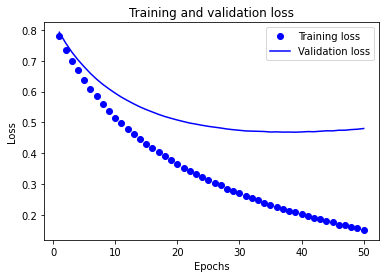

In [64]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

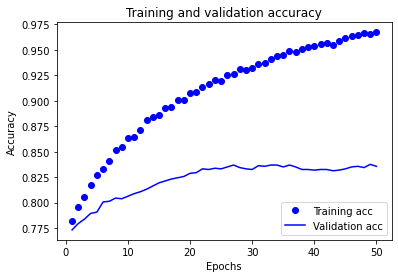

In [65]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [67]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

250/250 [==============================] - 4s 13ms/step - loss: 0.5485 - accuracy: 0.8019
0.8018749952316284


In [68]:
examples = [
  "Bootstrapping dataframe and calculate metrics using Pandas",
  "How can I cast int to enum?",
  "What is a monad?"
]

export_model.predict(examples)

array([[0.52385473, 0.29573306, 0.44977367, 0.8043049 ],
       [0.70925987, 0.75528216, 0.2275354 , 0.15268221],
       [0.55905807, 0.497007  , 0.53957236, 0.3885843 ]], dtype=float32)